## Simulation MACS 207b

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [21]:
r = 1 
alpha = 1
mu1 = 0.1
mu2 = 0.2
lamb = 5 
pI = 0.8
p = 0.5


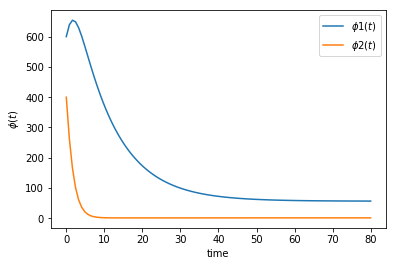

In [62]:
def diff_model(y,t,p):
    yp1 = r +lamb*pI*(y[0]/(y[0]+y[1]))-mu1*y[0] + alpha*p*(y[0]*y[1])/(y[0]+y[1])
    yp2 = lamb*(1-(pI*y[0])/(y[0]+y[1])) - mu2*y[1] - alpha*p*y[0]*y[1]/(y[0]+y[1])
    return np.array([yp1,yp2])

# initial condition
y0 = np.array([600,400])

# time points
t = np.linspace(0,80,100)

# solve ODE
y = odeint(diff_model,y0,t,(p,))

# plot results
plt.figure()
plt.plot(t,y.T[0])
plt.plot(t,y.T[1])
plt.xlabel('time')
plt.ylabel('$\phi(t)$')
plt.legend(('$\phi1(t)$', '$\phi2(t)$'))
plt.show()


In [63]:
p_l = np.linspace(0,1,100)
prevalance = []
for pi in p_l:
    y = odeint(diff_model,y0,t,(pi,))
    prevalance.append(y[-1,0]/(y[-1,0]+y[-1,1]))

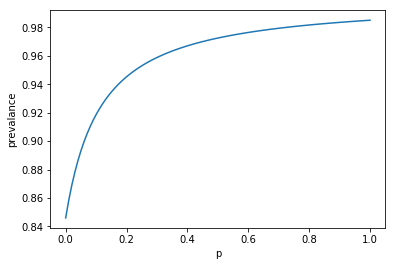

In [64]:
plt.plot(p_l,prevalance)
plt.xlabel('p')
plt.ylabel('prevalance')
plt.show()